::: {.callout-note collapse="true"}
## Learning Outcomes
* Derive the optimal model parameters for the constant model under MSE and MAE cost functions
* Evaluate the differences between MSE and MAE risk
* Understand the need for linearization of variables and apply the Tukey-Mosteller bulge diagram for transformations
:::

Last time, we introduced the modeling process. We set up a framework to predict target variables as functions of our features, following a set workflow:

1. Choose a model
2. Choose a loss function
3. Fit the model
4. Evaluate model performance

To illustrate this process, we derived the optimal model parameters under simple linear regression with mean squared error as the cost function. In this lecture, we'll continue familiarizing ourselves with the modeling process by finding the best model parameters under a new model. We'll also test out two different loss functions to understand how our choice of loss influences model design. Later on, we'll consider what happens when a linear model isn't the best choice to capture trends in our data – and what solutions there are to create better models.



## Constant Model + MSE

In today's lecture, our focus will be on the **constant model**. The constant model is slightly different from the simple linear regression model we've explored previously. Rather than generate predictions from an inputted feature variable, the constant model *predicts the same constant number every time.* We call this constant $\theta$.

$$\hat{y}_i = \theta$$

$\theta$ is the parameter of the constant model, just as $\theta_0$ and $\theta_1$ were the parameters in SLR. Our task now is to determine what value of $\theta$ represents the optimal model – in other words, what number should we guess each time to have the lowest possible average loss on our data?

Consider the case where L2 (squared) loss is used as the loss function and mean squared error is used as the cost function. At this stage, we're well into the modeling process:

1. Choose a model: constant model
2. Choose a loss function: L2 loss
3. Fit the model
4. Evaluate model performance

In Homework 5, you will fit the constant model under MSE cost to find that the best choice of $\theta$ is the **mean of the observed $y$ values**. In other words, $\hat{\theta} = \bar{y}$. 

Let's take a moment to interpret this result. Our optimal model parameter is the value of the parameter that minimizes the cost function. This minimum value of the cost function can be expressed:

$$R(\hat{\theta}) = \min_{\theta} R(\theta)$$

To restate the above in plain English: we are looking at the value of the cost function when it takes the best parameter as input. This optimal model parameter, $\hat{\theta}$, is the value of $\theta$ that minimizes the cost $R$.

For modeling purposes, we care less about the minimum value of cost, $R(\hat{\theta})$, and more about the *value of $\theta$* that results in this lowest average loss. In other words, we concern ourselves with finding the best parameter value such that:

$$\hat{\theta} = \underset{\theta}{\operatorname{\arg\min}}\:R(\theta)$$

That is, we want to find the **arg**ument $\theta$ that **min**imizes the cost function.

## Constant Model + MAE 

We see now that changing the model used for prediction leads to a wildly different result for the optimal model parameter. What happens if we instead change the loss function used in model evaluation?

This time, we will consider the constant model with L1 (absolute loss) as the loss function. This means that the average loss will be expressed as the mean absolute error. 

1. Choose a model: constant model
2. Choose a loss function: L1 loss
3. Fit the model
4. Evaluate model performance

To fit the model and find the optimal parameter value $\hat{\theta}$, follow the usual process of differentiating the cost function with respect to $\theta$, setting the derivative equal to zero, and solving for $\theta$. Writing this out in longhand:

$$\begin{align}
R(\theta) &= \frac{1}{n}\sum^{n}_{i=1} |y_i - \theta| \\
\frac{d}{d\theta} R(\theta) &= \frac{d}{d\theta} \left(\frac{1}{n} \sum^{n}_{i=1} |y_i - \theta| \right) \\
\frac{d}{d\theta} R(\theta) &= \frac{1}{n} \sum^{n}_{i=1} \frac{d}{d\theta} |y_i - \theta|
\end{align}$$

Here, we seem to have run into a problem: the derivative of an absolute value is undefined when the argument is 0 (i.e. when $y_i = \theta$). For now, we'll ignore this issue. It turns out that disregarding this case doesn't influence our final result.

To perform the derivative, consider two cases. When $\theta$ is *less than* $y_i$, the term $y_i - \theta$ will be positive and the absolute value has no impact. When $\theta$ is *greater than* $y_i$, the term $y_i - \theta$ will be negative. Applying the absolute value will convert this to a positive value, which we can express by saying $-(y_i - \theta) = \theta - y_i$. 

$$|y_i - \theta| = \begin{cases} y_i - \theta && \text{if}\:\theta \lt y_i \\ \theta - y_i && \text{if}\:\theta \gt y_i \end{cases}$$

Taking derivatives:

$$\frac{d}{d\theta} |y_i - \theta| = \begin{cases} \frac{d}{d\theta} (y_i - \theta) = -1 && \text{if}\:\theta \lt y_i \\ \frac{d}{d\theta} (\theta - y_i) = 1 && \text{if}\:\theta \gt y_i \end{cases}$$

This means that we obtain a different value for the derivative for datapoints where $\theta < y_i$ and where $\theta > y_i$. We can summarize this by saying:

$$\begin{align} \frac{d}{d\theta} R(\theta) &= \frac{1}{n} \sum^{n}_{i=1} \frac{d}{d\theta} |y_i - \theta| \\
&= \frac{1}{n} \left[\sum_{\theta < y_i} (-1) + \sum_{\theta > y_i} (+1) \right]
\end{align}$$

To finish finding the best value of $\theta$, set this derivative equal to zero and solve for $\theta$. You'll find that $\hat{\theta} = \text{median}(y)$.

## Evaluating Models (SLR)

This leaves us with one final question – how "good" are the predictions made by "best" fitted models? 

One way we might want to evaluate our model's performance is by computing summary statistics. If the mean and standard deviation of our predictions are close to those of the original $y_i$ observations, we might be inclined to say that our model has done well. A large magnitude for the correlation coefficient between the feature and response variables might also support this conclusion. However, we should be cautious with this approach. To see why, we'll consider a classic dataset called **Anscombe's quartet.**

<img src="images/quartet.png" alt='quartet' width='600'>

It turns out that the four sets of points shown here all have identical means, standard deviations, and correlation coefficients. However, it only makes sense to model the first of these four sets of data using SLR! It is important to visualize your data *before* starting to model to confirm that your choice of model makes sense for the data. 

Another way of evaluating model performance is by using performance metrics. A common choice of metric is the **Root Mean Squared Error**, or RMSE. The RMSE is simply the square root of MSE. Taking the square root converts the value back into the original, non-squared units of $y_i$, which is useful for understanding the model's performance. A low RMSE indicates more "accurate" predictions – that there is lower average loss across the dataset.
$$\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2}$$

We may also wish to visualize the model's **residuals**, defined as the difference between the observed and predicted $y_i$ value ($e_i = y_i - \hat{y}_i$). This gives a high-level view of how "off" each prediction is from the true observed value. Recall that you explored this concept in [Data 8](https://inferentialthinking.com/chapters/15/5/Visual_Diagnostics.html?highlight=heteroscedasticity#detecting-heteroscedasticity): a good regression fit should display no clear pattern in its plot of residuals. The residual plots for Anscombe's quartet are displayed below. Note how only the first plot shows no clear pattern to the magnitude of residuals. This is an indication that SLR is not the best choice of model for the remaining three sets of points.

<img src="images/residual.png" alt='residual' width='600'>


## Comparing Loss Functions

Now, we've tried our hand at fitting a model under both MSE and MAE cost functions. How do the two results compare?

Let's consider a dataset where each entry represents the number of drinks sold at a bubble tea store each day. We'll fit a constant model to predict the number of drinks that will be sold tomorrow.

In [1]:
#| code-fold: false
import numpy as np
drinks = np.array([20, 21, 22, 29, 33])
drinks

array([20, 21, 22, 29, 33])

From our derivations above, we know that the optimal model parameter under MSE cost is the mean of the dataset. Under MAE cost, the optimal parameter is the median of the dataset. 

In [2]:
#| code-fold: false
np.mean(drinks), np.median(drinks)

(25.0, 22.0)

If we plot each empirical risk function across several possible values of $\theta$, we find that each $\hat{\theta}$ does indeed correspond to the lowest value of error:

<img src="images/error.png" alt='error' width='600'>

Notice that the MSE above is a **smooth** function – it is differentiable at all points, making it easy to minimize using numerical methods. The MAE, in contrast, is not differentiable at each of its "kinks." We'll explore how the smoothness of the cost function can impact our ability to apply numerical optimization in a few weeks. 

How do outliers affect each cost function? Imagine we replace the largest value in the dataset with 1000. The mean of the data increases substantially, while the median is nearly unaffected.

In [3]:
#| code-fold: false
drinks_with_outlier = np.append(drinks, 1000)
display(drinks_with_outlier)
np.mean(drinks_with_outlier), np.median(drinks_with_outlier)

array([  20,   21,   22,   29,   33, 1000])

(187.5, 25.5)

This means that under the MSE, the optimal model parameter $\hat{\theta}$ is strongly affected by the presence of outliers. Under the MAE, the optimal parameter is not as influenced by outlying data. We can generalize this by saying that the MSE is **sensitive** to outliers, while the MAE is **robust** to outliers.

Let's try another experiment. This time, we'll add an additional, non-outlying datapoint to the data.

In [4]:
#| code-fold: false
drinks_with_additional_observation = np.append(drinks, 35)
drinks_with_additional_observation

array([20, 21, 22, 29, 33, 35])

When we again visualize the cost functions, we find that the MAE now plots a horizontal line between 22 and 29. This means that there are *infinitely* many optimal values for the model parameter: any value $\hat{\theta} \in [22, 29]$ will minimize the MAE. In contrast, the MSE still has a single best value for $\hat{\theta}$. In other words, the MSE has a **unique** solution for $\hat{\theta}$; the MAE is not guaranteed to have a single unique solution.

<img src="images/compare_loss.png" alt='compare_loss' width='600'>

## Linear Transformations

At this point, we have an effective method of fitting models to predict linear relationships. Given a feature variable and target, we can apply our four-step process to find the optimal model parameters. 

A key word above is *linear*. When we computed parameter estimates earlier, we assumed that $x_i$ and $y_i$ shared roughly a linear relationship. 

Data in the real world isn't always so straightforward. Consider the dataset below, which contains information about the ages and lengths of dugongs.

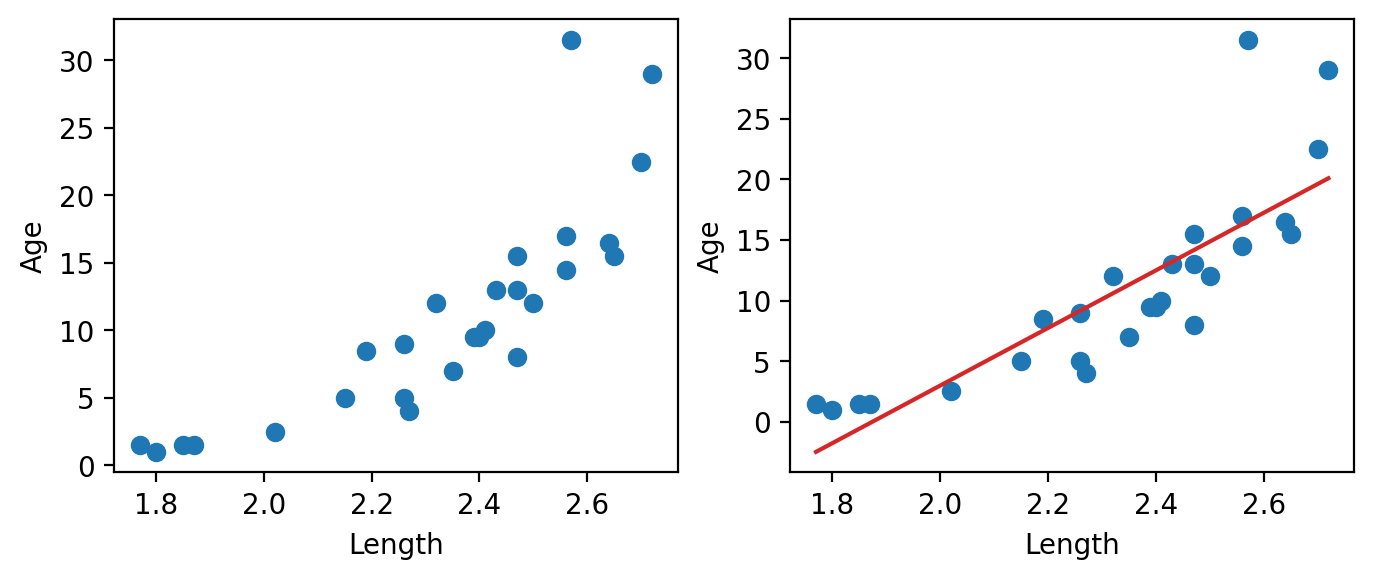

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dugong = pd.read_csv("data/dugongs.txt", delimiter="\t").sort_values("Length")
x, y = dugong["Length"], dugong["Age"]

# `corrcoef` computes the correlation coefficient between two variables
# `std` finds the standard deviation
r = np.corrcoef(x, y)[0, 1]
theta_1 = r*np.std(y)/np.std(x)
theta_0 = np.mean(y) - theta_1*np.mean(x)

fig, ax = plt.subplots(1, 2, dpi=200, figsize=(8, 3))
ax[0].scatter(x, y)
ax[0].set_xlabel("Length")
ax[0].set_ylabel("Age")

ax[1].scatter(x, y)
ax[1].plot(x, theta_0 + theta_1*x, "tab:red")
ax[1].set_xlabel("Length")
ax[1].set_ylabel("Age");

Looking at the plot on the left, we see that there is a slight curvature to the data points. Plotting the SLR curve on the right results in a poor fit.

For SLR to perform well, we'd like there to be a rough linear trend relating `"Age"` and `"Length"`. What is making the raw data deviate from a linear relationship? Notice that the data points with `"Length"` greater than 2.6 have disproportionately high values of `"Age"` relative to the rest of the data. If we could manipulate these data points to have lower `"Age"` values, we'd "shift" these points downwards and reduce the curvature in the data. Applying a logarithmic transformation to $y_i$ (that is, taking $\log($ `"Age"` $)$ ) would achieve just that.

An important word on $\log$: in Data 100 (and most upper-division STEM courses), $\log$ denotes the natural logarithm with base $e$. The base-10 logarithm, where relevant, is indicated by $\log_{10}$.

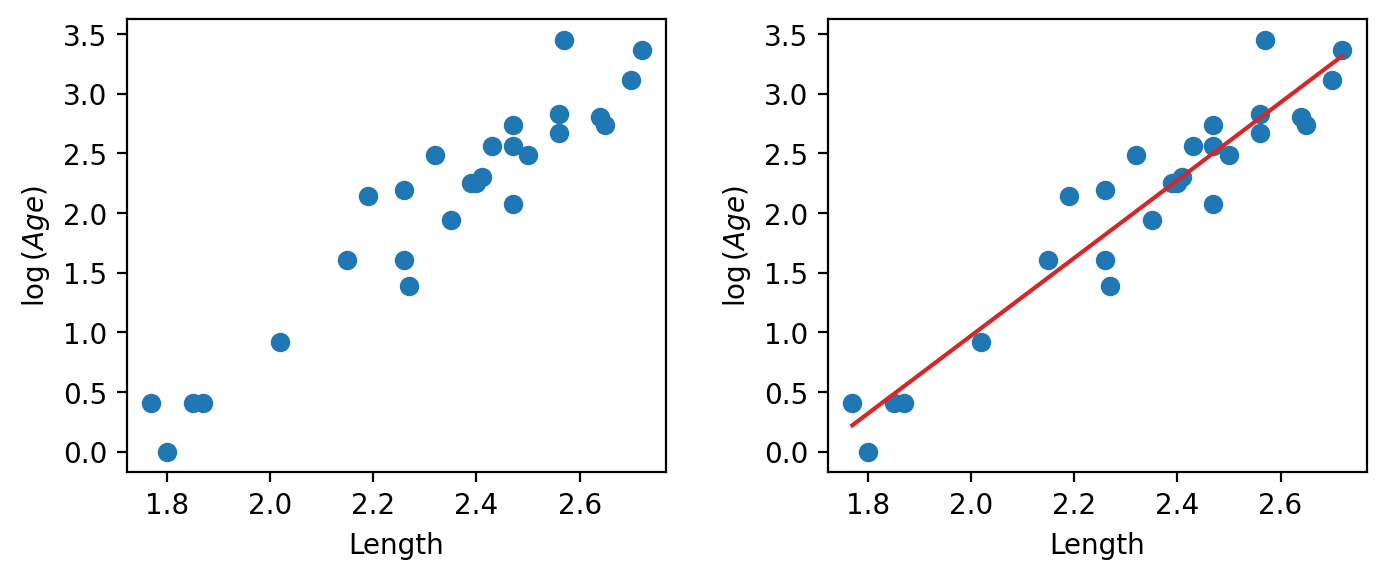

In [6]:
z = np.log(y)

r = np.corrcoef(x, z)[0, 1]
theta_1 = r*np.std(z)/np.std(x)
theta_0 = np.mean(z) - theta_1*np.mean(x)

fig, ax = plt.subplots(1, 2, dpi=200, figsize=(8, 3))
ax[0].scatter(x, z)
ax[0].set_xlabel("Length")
ax[0].set_ylabel(r"$\log{(Age)}$")

ax[1].scatter(x, z)
ax[1].plot(x, theta_0 + theta_1*x, "tab:red")
ax[1].set_xlabel("Length")
ax[1].set_ylabel(r"$\log{(Age)}$")

plt.subplots_adjust(wspace=0.3);

Our SLR fit looks a lot better! We now have a new target variable: the SLR model is now trying to predict the *log* of `"Age"`, rather than the untransformed `"Age"`. In other words, we are applying the transformation $z_i = \log{(y_i)}$. The SLR model becomes:

$$\hat{\log{(y_i)}} = \theta_0 + \theta_1 x_i$$
$$\hat{z}_i = \theta_0 + \theta_1 x_i$$

It turns out that this linearized relationship can help us understand the underlying relationship between $x_i$ and $y_i$. If we rearrange the relationship above, we find:
$$\begin{align}
\log{(y_i)} &= \theta_0 + \theta_1 x_i \\
y_i &= e^{\theta_0 + \theta_1 x_i} \\
y_i &= (e^{\theta_0})e^{\theta_1 x_i} \\
y_i &= C e^{k x_i}
\end{align}$$

For some constants $C$ and $k$.

$y_i$ is an *exponential* function of $x_i$. Applying an exponential fit to the untransformed variables corroborates this finding. 

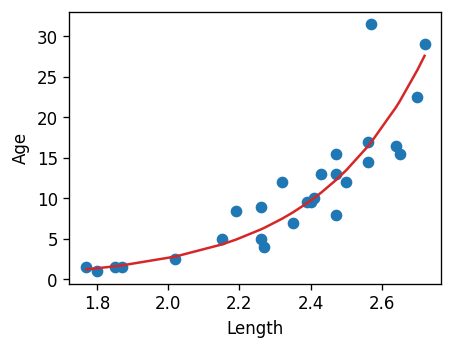

In [7]:
plt.figure(dpi=120, figsize=(4, 3))

plt.scatter(x, y)
plt.plot(x, np.exp(theta_0)*np.exp(theta_1*x), "tab:red")
plt.xlabel("Length")
plt.ylabel("Age");

You may wonder: why did we choose to apply a log transformation specifically? Why not some other function to linearize the data?

Practically, many other mathematical operations that modify the relative scales of `"Age"` and `"Length"` could have worked here. The **Tukey-Mosteller Bulge Diagram** is a useful tool for summarizing what transformations can linearize the relationship between two variables. To determine what transformations might be appropriate, trace the shape of the "bulge" made by your data. Find the quadrant of the diagram that matches this bulge. The transformations shown on the vertical and horizontal axes of this quadrant can help improve the fit between the variables.

<img src="images/bulge.png" alt='bulge' width='600'>
